In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
from datetime import datetime as dt    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("data_date.csv")

In [3]:
data

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
13772,2024-07-04,Uzbekistan,Good,19
13773,2024-07-04,Vatican,Good,38
13774,2024-07-04,Venezuela,Good,10
13775,2024-07-04,Vietnam,Good,50


In [4]:
data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [5]:
data.isna().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [6]:
data.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

In [7]:
data['AQI Value'].value_counts()

AQI Value
15     221
33     215
25     210
83     203
23     193
      ... 
396      1
285      1
260      1
275      1
248      1
Name: count, Length: 307, dtype: int64

In [8]:
data['AQI Value']

0         14
1         65
2         55
3        113
4         63
        ... 
13772     19
13773     38
13774     10
13775     50
13776    114
Name: AQI Value, Length: 13777, dtype: int64

In [9]:
avg = data.groupby("Country").agg({"AQI Value":"mean"})

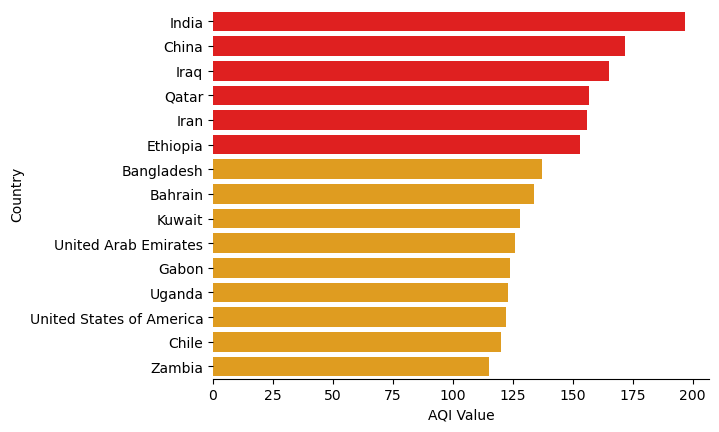

In [10]:
poorest = np.round(avg.sort_values("AQI Value", ascending = False)).astype("int").head(15)
colors = ["Red"] * 6 + ["Orange"] * 9

sns.barplot(y = poorest.index , x = poorest["AQI Value"], palette = colors)
sns.despine(left = True)
plt.show()


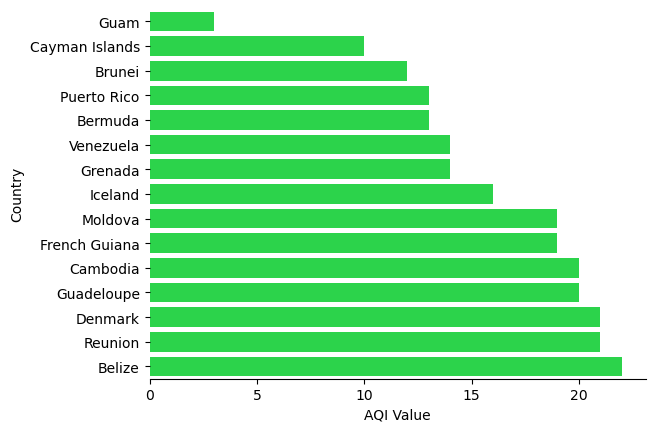

In [11]:
best = np.round(avg.sort_values("AQI Value")).astype("int").head(15)
sns.barplot(y = best.index , x = best["AQI Value"], color = "#10ef3a")
sns.despine(left = True)
plt.show()

In [12]:
label_encoder = LabelEncoder()
data.select_dtypes(include=('object')).columns.tolist()

['Date', 'Country', 'Status']

In [13]:
categorical_cols = data.select_dtypes(include=('object')).columns.tolist()

In [14]:
encoder = LabelEncoder()
for col in categorical_cols:
    data[col]= encoder.fit_transform(data[col])
    
data[col]

0        0
1        2
2        2
3        4
4        2
        ..
13772    0
13773    0
13774    0
13775    0
13776    4
Name: Status, Length: 13777, dtype: int32

In [15]:
X = data.drop(['AQI Value'], axis = 1)
y = data['AQI Value']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train.value_counts()

AQI Value
25     179
15     178
33     165
83     164
30     159
      ... 
298      1
309      1
239      1
308      1
211      1
Name: count, Length: 297, dtype: int64

In [18]:
y_test.value_counts()

AQI Value
33     50
61     44
15     43
38     42
83     39
       ..
382     1
167     1
186     1
143     1
223     1
Name: count, Length: 211, dtype: int64

In [19]:
rf_model = RandomForestClassifier()

In [20]:
rf_model.fit(X_test, y_test)

RandomForestClassifier()

In [21]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.988388969521045

In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt_model = dt.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [24]:
dt_accuracy

0.13679245283018868

In [25]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_predictions = gb_model.predict(X_test)